Se importan librerias para el correcto funcionamiento

In [2]:
import cx_Oracle
import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sbn
from collections import Counter
import numpy as np
from matplotlib import ticker as tick

Conexion a base de datos Oracle. Tabla facturación

In [3]:
username = 'equinoxconsulta'
password = 'Asw_2022_Col_#'
port = 1521
encoding = 'UTF-8'
ip = '172.200.5.99' #ip
SID = 'aswprod_pdb1.subnetpriaswpro.vcnaswpro01.oraclevcn.com'
dsn_tns = cx_Oracle.makedsn(ip, port,service_name=SID)
connection = cx_Oracle.connect(username, password, dsn_tns)
c = connection.cursor()

DatabaseError: ORA-12170: TNS:Connect timeout occurred

C:\Users\jbautista\Miniconda3\envs\spyder-env\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\jbautista\AppData\Local\Temp\ipykernel_14944\3253852228.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FECHA_FACTURACION']= pd.to_datetime(df2['FECHA_FACTURACION'])


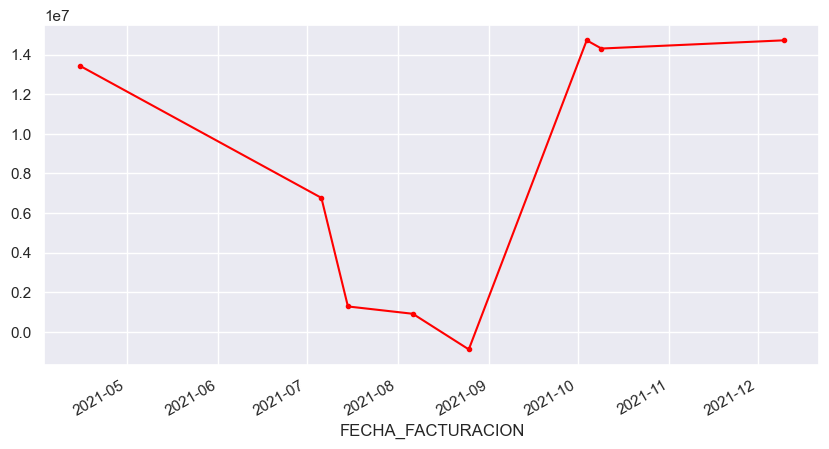

In [1]:
import cx_Oracle
import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sbn

sbn.set(rc={'figure.figsize':(10, 5)})


username = 'equinoxconsulta'
password = 'Asw_2022_Col_#'
port = 1521
encoding = 'UTF-8'
ip = '172.200.5.99' #ip
SID = 'aswprod_pdb1.subnetpriaswpro.vcnaswpro01.oraclevcn.com'
dsn_tns = cx_Oracle.makedsn(ip, port,service_name=SID)
connection = cx_Oracle.connect(username, password, dsn_tns)
c = connection.cursor()
query = ("select * from ARES2.facturas where fecha_facturacion >= '01/01/21'")
df = pd.read_sql(query, connection)

df2=df[['VALOR_NETO','RECAUDO','FECHA_FACTURACION']]

df2['FECHA_FACTURACION']= pd.to_datetime(df2['FECHA_FACTURACION'])
other=df2.set_index('FECHA_FACTURACION')
other=other.sample(n=15)
other['Año'] = other.index.year                                
other['Mes'] = other.index.month                               
other['Dia'] = other.index.day   
other['diff'] = other['VALOR_NETO']-other['RECAUDO']
other.index 
#other['VALOR_NETO'].plot(linewidth=0.1)
eje = other.loc['2021','VALOR_NETO'].plot(marker='.',color='red')
#eje.set_ylabel('Valor Neto')
#eje2 = other.loc['2021','diff'].plot(marker='.')



